In [187]:
import csv
leverage_file_path = '/Users/noahjillson/Desktop/MCM/data/p_hat_by_match/Jannik Sinner_vs_Novak Djokovic_leverage.csv'
matches_file_path = '/Users/noahjillson/Desktop/MCM/data/Wimbledon_featured_matches.csv'

leverages = []
with open(leverage_file_path, 'r') as file:
    csv_reader = csv.DictReader(file)

    for row in csv_reader:
        leverages.append(row)

matches = []
with open(matches_file_path, 'r') as file:
    csv_reader = csv.DictReader(file)

    for row in csv_reader:
        matches.append(row)

## Extracting match information for Alcaraz Vs Djokovic

In [188]:
Alcaraz_vs_Djokovic = []
for r in matches:
    if r['player1'] == 'Carlos Alcaraz' and r['player2'] == 'Novak Djokovic':
        Alcaraz_vs_Djokovic.append(r)

len(Alcaraz_vs_Djokovic)

334

## Defining Momentum

\begin{equation}
    y_t = \frac{x_t + (1-\alpha)x_{t-1} + (1-\alpha)^2x_{t-2} + \cdots + (1-\alpha)^tx_0}{1 + (1-\alpha) + (1-\alpha)^2 + \cdots + (1-\alpha)^t}
\end{equation}

In [189]:
alpha = .1

def calc_momentum(leverages):
    num = 0
    denom = 0
    k = len(leverages)

    for t, x in enumerate(leverages):
        num += x * (1 - alpha) ** (k - t)
        denom += (1 - alpha) ** (k - t)
        
    return num / denom


## Calculation Momentum From Leverage

In [190]:
p1 = Alcaraz_vs_Djokovic[0]['player1']
p2 = Alcaraz_vs_Djokovic[0]['player2']

Alcaraz = '1'
Djokovic = '2'

print(f'player1:    {p1}')
print(f'player2:    {p2}')

player1:    Carlos Alcaraz
player2:    Novak Djokovic


In [191]:
signed_leverage = []
for r, l in zip(Alcaraz_vs_Djokovic, leverages):
    if r['point_victor'] == Alcaraz:
        signed_leverage.append(float(l['Leverage']))
    else:
        signed_leverage.append(-float(l['Leverage']))

print(signed_leverage)

[-0.112682177827307, 0.139919241433548, 0.0702757675561504, -0.123690673966373, 0.163189691391258, -0.211169947652206, -0.111264474515157, 0.186926124096222, -0.138879423014174, -0.11977757972317, -0.0470100212398134, -0.0341462524395267, -0.108917716900816, 0.197061543342418, 0.116295387168496, -0.0812151092483517, -0.0364056008573722, 0.0518827819293436, 0.0617970439757183, -0.043479232985532, -0.0228201464735015, -0.0442958349365641, -0.0166228848732941, 0.0524618584417743, -0.0504714661558989, -0.0982725551375821, 0.0506034448260801, 0.072433476133508, -0.0867466258777515, -0.0917195028830381, -0.0694166510094866, -0.100451564955852, 0.194591033274335, -0.117027352359461, -0.0857966684713967, 0.0593986502092302, 0.112989727669912, -0.0928827154564421, -0.100185697448909, 0.135955723035227, 0.171243968310254, -0.154112615913351, -0.131784702804294, -0.103057242187218, -0.134834477732676, 0.14829563478258, -0.120343761904285, 0.135484104091778, 0.146982665318674, 0.189612630447158, 0

In [192]:
momentum = []
for n in range(1, len(signed_leverage)):
    momentum.append(calc_momentum(signed_leverage[:n]))

for m in momentum:
    print(m)

-0.112682177827307
0.020265937573143007
0.03871974937499075
-0.008506311497752408
0.03342087047314218
-0.018779774082900536
-0.036507232561153104
0.002723758275629983
-0.020392127702770615
-0.03565117302527743
-0.03730652476195709
-0.036866111940764265
-0.04652692030135032
-0.014942592911761969
0.0015838539501688207
-0.008579294249268243
-0.011918872431538226
-0.004411959660940847
0.0032430141556077023
-0.0020758616899975357
-0.004405159589946498
-0.008829969532522408
-0.009685045961363499
-0.0029316621127098187
-0.008053325716508918
-0.017698426519816388
-0.010446544343921414
-0.001700837815076167
-0.01062579352127803
-0.019094147804191625
-0.02432600412931757
-0.0322092458059356
-0.008805983262470564
-0.019937725526941567
-0.02669270752513619
-0.017885151613098785
-0.004526815954114808
-0.013526634628194084
-0.022337239261067527
-0.006270461875658264
0.01172030866903556
-0.005063933381986748
-0.01787404262892176
-0.026475779973827607
-0.03740705754208081
-0.018689760814073107
-0.0289

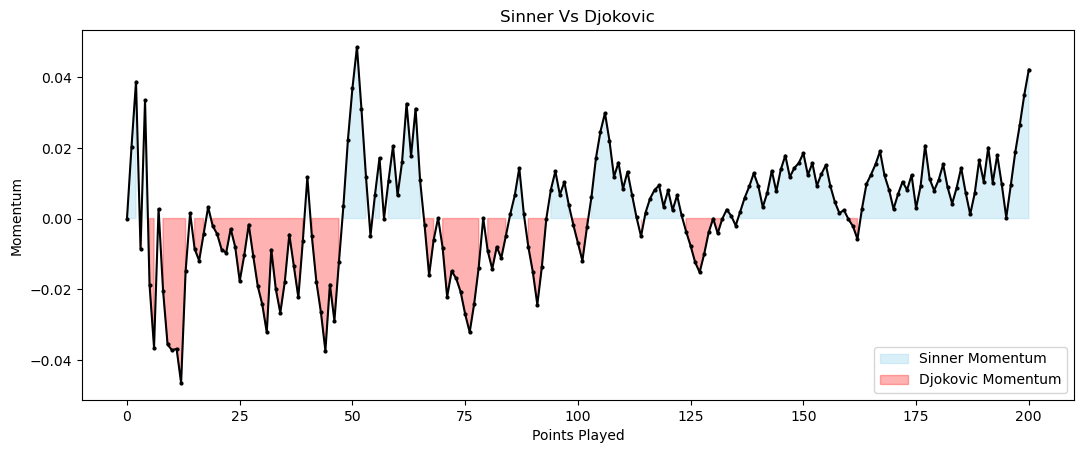

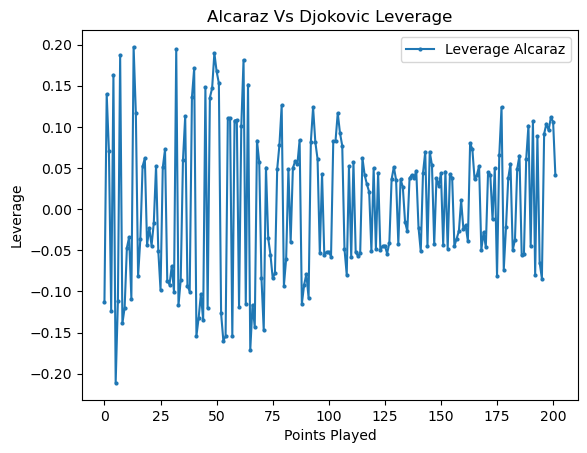

In [194]:
import matplotlib.pyplot as plt
import numpy as np

momentum[0] = 0

momentum_Djokovic = list(map(lambda x: -x, momentum))
plt.plot(momentum, marker='o', markersize=2, color='black')
#plt.plot(momentum_Djokovic, label='Djokovic', marker='o', markersize=2)


plt.fill_between(np.arange(len(momentum)), momentum, where=[x >= 0 for x in momentum], color='skyblue', alpha=0.3, label='Sinner Momentum')
plt.fill_between(np.arange(len(momentum)), momentum, where=[x < 0 for x in momentum], color='red', alpha=0.3, label='Djokovic Momentum')
#plt.fill_between(np.arange(len(momentum_Djokovic)), momentum_Djokovic, color='red', alpha=0.3, label='Djokovic Avantage')

# Adding labels and title
plt.xlabel('Points Played')
plt.ylabel('Momentum')
plt.title('Sinner Vs Djokovic')

# Adding legend
plt.legend()

fig = plt.gcf()

# Get the current size of the figure
fig_size = fig.get_size_inches()

# Double the width
fig.set_size_inches(fig_size[0] * 2, fig_size[1])

plt.show()

plt.plot(signed_leverage, label='Leverage Alcaraz', marker='o', markersize=2)

plt.xlabel('Points Played')
plt.ylabel('Leverage')
plt.title('Alcaraz Vs Djokovic Leverage')

plt.legend()
plt.show()

In [157]:
print(signed_leverage)

[-0.154540499063871, 0.194880572072452, 0.211119812992572, -0.091051022053673, 0.118341451753215, -0.188110988211631, -0.129039829410613, 0.161655864655614, -0.167790154932047, -0.136448153828996, -0.173484618983843, -0.216088039594327, -0.142018625557929, 0.236511329099108, 0.269485503153764, -0.236126271312626, -0.154046500361616, 0.228803782652623, 0.154057357415372, -0.151323267133344, -0.198265938546821, -0.155820078796179, -0.149102434662202, 0.131675415352548, -0.151514192610542, -0.212722774257056, 0.164086979031515, 0.162989867154182, -0.20893030557463, -0.177540757207455, -0.155647382931206, -0.148431514923154, 0.142775449447937, -0.210857539066506, -0.149357305319715, 0.164759132107311, 0.206481296336895, -0.213454149659563, -0.280979701777706, 0.281316248809951, 0.151285502837528, -0.128417879952114, -0.141486010120527, -0.129297625227752, -0.14094868192451, 0.139680984696649, -0.142867040410561, 0.145634640604571, 0.0857146940236455, 0.091364544363304, 0.0572155886736145, 

In [158]:
for l in leverages:
    print(l)

{'Leverage': '0.154540499063871'}
{'Leverage': '0.194880572072452'}
{'Leverage': '0.211119812992572'}
{'Leverage': '0.091051022053673'}
{'Leverage': '0.118341451753215'}
{'Leverage': '0.188110988211631'}
{'Leverage': '0.129039829410613'}
{'Leverage': '0.161655864655614'}
{'Leverage': '0.167790154932047'}
{'Leverage': '0.136448153828996'}
{'Leverage': '0.173484618983843'}
{'Leverage': '0.216088039594327'}
{'Leverage': '0.142018625557929'}
{'Leverage': '0.236511329099108'}
{'Leverage': '0.269485503153764'}
{'Leverage': '0.236126271312626'}
{'Leverage': '0.154046500361616'}
{'Leverage': '0.228803782652623'}
{'Leverage': '0.154057357415372'}
{'Leverage': '0.151323267133344'}
{'Leverage': '0.198265938546821'}
{'Leverage': '0.155820078796179'}
{'Leverage': '0.149102434662202'}
{'Leverage': '0.131675415352548'}
{'Leverage': '0.151514192610542'}
{'Leverage': '0.212722774257056'}
{'Leverage': '0.164086979031515'}
{'Leverage': '0.162989867154182'}
{'Leverage': '0.20893030557463'}
{'Leverage': '0